In [3]:
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [4]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import WordPunctTokenizer
from tensorflow.keras.preprocessing.text import text_to_word_sequence

In [6]:
from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud

In [14]:
text = "파이썬 AI 머신러닝 딥러닝 데이터과학 분석 예측 모델링 토필모델링 텍스트마이닝"

wordcloud = WordCloud(
    font_path = '/System/Library/Fonts/Supplemental/AppleGothic.ttf',
    width = 800,
    height = 400,
    background_color = 'white'
).generate(text)

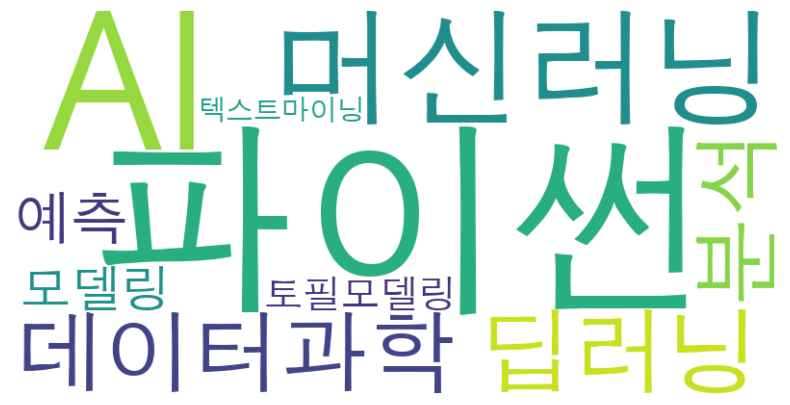

In [15]:
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [37]:
text = "파이썬 AI 머신러닝 딥러닝 데이터과학 분석 예측 모델링 토픽모델링 텍스트마이닝 머신러닝 정말 재미있다"
nouns = word_tokenize(text)
print(nouns)
count = Counter(nouns)
print(count)

['파이썬', 'AI', '머신러닝', '딥러닝', '데이터과학', '분석', '예측', '모델링', '토픽모델링', '텍스트마이닝', '머신러닝', '정말', '재미있다']
Counter({'머신러닝': 2, '파이썬': 1, 'AI': 1, '딥러닝': 1, '데이터과학': 1, '분석': 1, '예측': 1, '모델링': 1, '토픽모델링': 1, '텍스트마이닝': 1, '정말': 1, '재미있다': 1})


In [26]:
top_20 = count.most_common(20)
words_top, counts_top = [], []
for word, cnt in top_20 :
    words_top.append(word)
    counts_top.append(cnt)
    
plt.rcParams['font.family'] = 'AppleGothic'

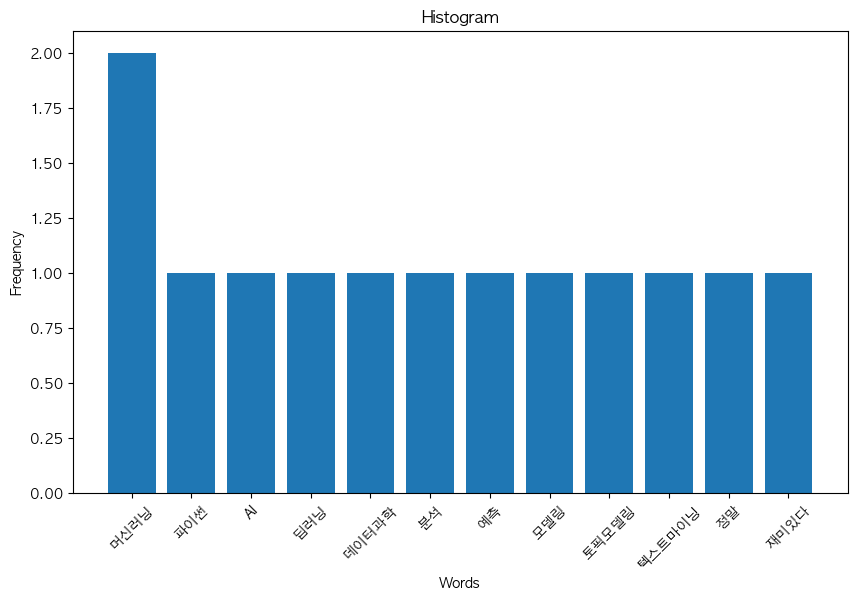

In [27]:
plt.figure(figsize=(10,6))
plt.bar(words_top, counts_top)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.xticks(rotation=45)
plt.show()

# 예제

In [ ]:
# 아래 기사에 접근하여 스크롤을 3번 내린 후
# 검색된 기사에서 요약기사의 내용을 수집하여 DataFrame 형태로 저장
# 형태소 분석 (Okt) 사용하여 수집된 요약기사 내용들의 WordCloud를 그리기
# 단어들의 빈도 그래프를 히스토그램으로 표현

In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import time
import pandas as pd

driver = webdriver.Chrome()

# url 접근
url_CNN = 'https://edition.cnn.com/search?q=trump&from=0&size=10&page=1&sort=newest&types=all&section='
driver.get(url_CNN)
time.sleep(2)

# 스크롤 3번 내리기
for i in range(3) :
    driver.execute_script("window.scrollTo(0, document.documentElement.scrollHeight);")
    time.sleep(1)

# 요약기사 내용 수집
news_list = []
headline = driver.find_elements(By.CSS_SELECTOR, ".container__headline-text")
description = driver.find_elements(By.CSS_SELECTOR, ".container__description")
for i in range(len(headline)) :
    news_list.append({
        "Title" : headline[i].text.strip(),
        "Summary" : description[i].text.strip()
    })

driver.quit()

# df 저장
news_df = pd.DataFrame(news_list)
news_df

,Title,Summary
0,Americans likely rushed to shop in March ahead...,Americans rushing to buy goods ahead of Presid...
1,Why Trump is relishing his duel with Harvard a...,Harvard University is such a perfect foil for ...
2,Donors open their wallets to progressives chal...,Donors filled the coffers of Democrats who hav...
3,Trump signs directive on lowering drug prices ...,In his first major action on health care costs...
4,Biden slams Trump administration’s cuts to Soc...,Former President Joe Biden offered his first p...
5,'I'm pissed!': Town hall erupts in anger at Re...,Sen. Chuck Grassley (R-IA) faced criticism of ...
6,"Toy Association CEO: ""Christmas is at risk"" du...",Greg Ahearn joins The Lead
7,Garcia-Navarro: Trump ‘trying to weaponize the...,GOP strategist Scott Jennings and New York Tim...
8,Trump to name Hunter Biden whistleblower as ac...,President Donald Trump is set name Gary Shaple...
9,GOP Sen. Grassley faces frustrated Iowans at t...,A room full of frustrated Iowans urged Sen. Ch...


In [2]:
# 형태소 분석
from nltk.tokenize import word_tokenize

all_text = " ".join(news_df["Title"].tolist())
nouns = word_tokenize(all_text)

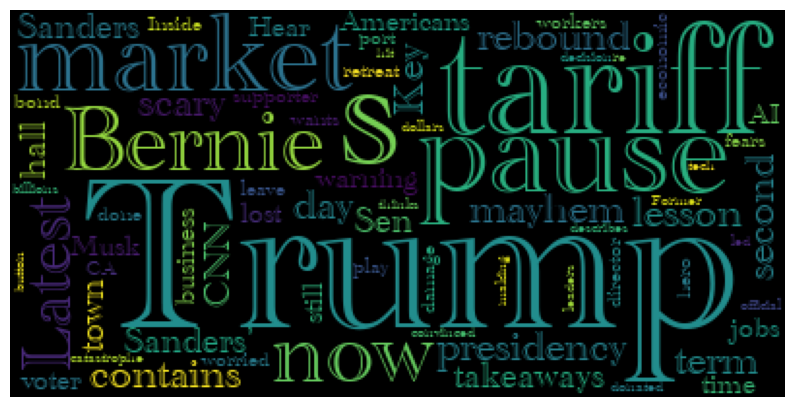

In [3]:
# wordcloud 그리기
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(
    font_path='/System/Library/Fonts/Supplemental/Academy Engraved LET Fonts.ttf',
    background_color="black"
).generate(all_text)

plt.figure(figsize=(10,6))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

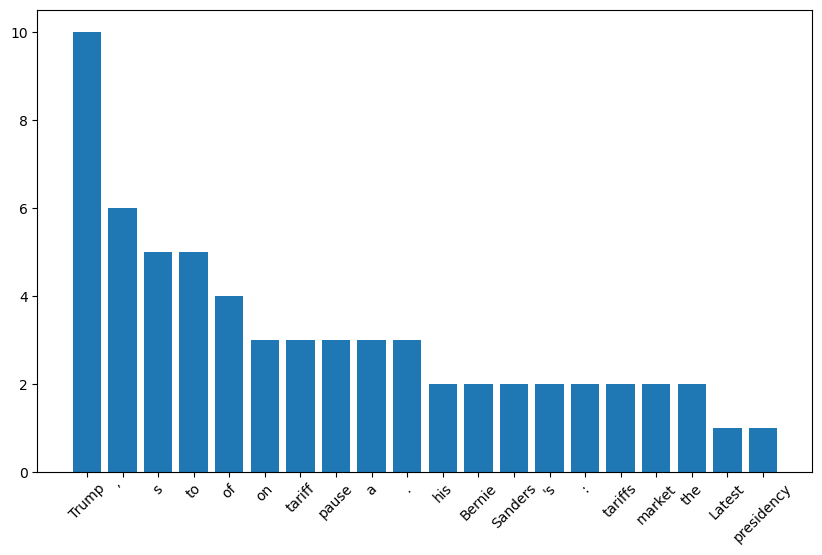

In [4]:
# 빈도 히스토그램으로 표현
from collections import Counter

count = Counter(nouns)
top_20 = count.most_common(20)
words_top, counts_top = [], []
for word, cnt in top_20 :
    words_top.append(word)
    counts_top.append(cnt)
    
plt.figure(figsize=(10,6))
plt.bar(words_top, counts_top)
plt.xticks(rotation=45)
plt.show()

# 실습

In [5]:
# url 접근하여 스크롤 3번 내린 후 검색된 댓글을 수집, DataFrame 형태로 저장
# 형태소 분석, 불용어 처리
# 수집된 요약기사 내용의 wordcloud 그리기
# 빈도 그래프를 히스토그램으로 표현
# 어떤 내용을 유추할 수 있는지 설명

In [37]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import time
import pandas as pd
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter 
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/parkchaeyeon/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [38]:
# url 접근
driver = webdriver.Chrome()
url_imdb = 'https://www.imdb.com/title/tt0468569/reviews/?ref_=tt_ururv_sm'
driver.get(url_imdb)
time.sleep(2)

# 스크롤 3번
for i in range(3) :
    driver.execute_script("window.scrollTo(0, document.documentElement.scrollHeight);")
    time.sleep(1)

# 댓글 수집
time.sleep(3)
reviews = []
review_title = driver.find_elements(By.CSS_SELECTOR, "h3.ipc-title__text")
review_contents = driver.find_elements(By.CSS_SELECTOR, ".ipc-html-content-inner-div")
for i in range(5) :
    reviews.append({
        "Title" : review_title[i].text.strip(),
        "Contents" : review_contents[i].text.strip()
    })

# driver 종료
driver.quit()

# dataframe 변환
df_reviews = pd.DataFrame(reviews)
df_reviews

,Title,Contents
0,Perfect combo,Best movie ever. Heath ledger's work is phenom...
1,This town deserves a better class of criminal!,This movie is a work of art. The finest sequel...
2,MASTERPIECE,It is just what you want for the best movie. G...
3,The Dark Knight,"Confidently directed, dark, brooding, and pack..."
4,The Batman of our dreams! So much more than a ...,We've been subjected to enormous amounts of hy...


In [39]:
# 형태소 분석
all_text = " ".join(df_reviews["Contents"].tolist())
nouns = word_tokenize(all_text)

# 불용어 처리
stop_words = set(stopwords.words('english'))
filtered_nouns = [t for t in nouns if t not in stop_words and len(t) >=4]

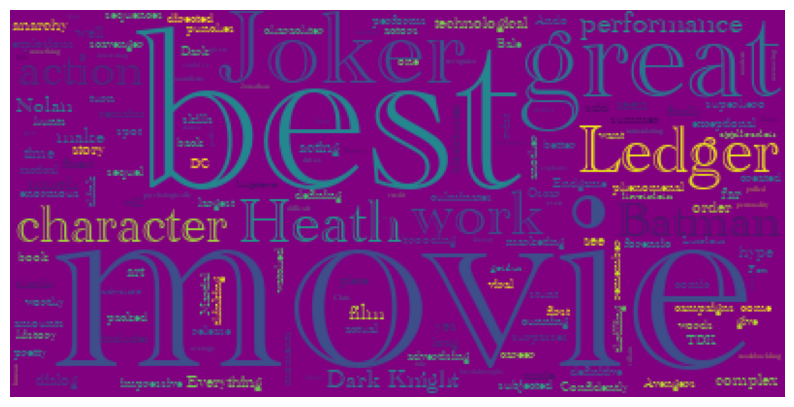

In [40]:
# wordcloud
wordcloud = WordCloud(
    font_path='/System/Library/Fonts/Supplemental/Academy Engraved LET Fonts.ttf',
    background_color="purple"
).generate(all_text)

plt.figure(figsize=(10,6))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

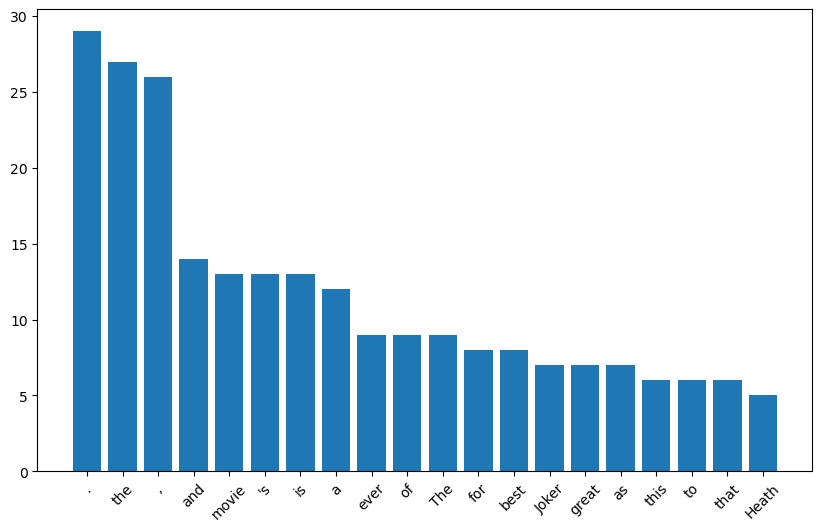

In [41]:
# 빈도 그래프
count = Counter(nouns)
top_20 = count.most_common(20)
words_top, counts_top = [], []
for word, cnt in top_20 :
    words_top.append(word)
    counts_top.append(cnt)
    
plt.figure(figsize=(10,6))
plt.bar(words_top, counts_top)
plt.xticks(rotation=45)
plt.show()